### Objetivo é criar um regressor para a função seno. 
Vamos começar montando uma função seno regular

In [4]:
import matplotlib.pyplot as plt
import numpy as np

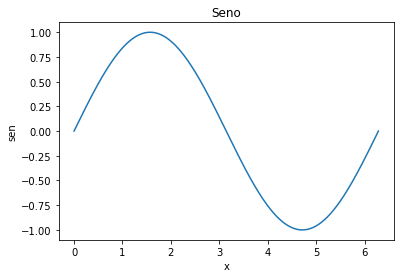

In [5]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

file = plt.figure()
plt.plot(x, y)
plt.title('Seno')
plt.ylabel('sen')
plt.xlabel('x')

plt.show()

Agora plotar amostras ideais da função

In [6]:
def plot_sin_with_samples(number_of_samples = 10, sample_step = 100):
    x = np.linspace(0, 2 * np.pi, 1000)
    y = np.sin(x)
    
    x_len = x.size
    samples_indexes = np.random.randint(0, x.size, number_of_samples)
    
    x_samples = [val for idx, val in enumerate(x) if idx in samples_indexes]
    y_samples = [val for idx, val in enumerate(y) if idx in samples_indexes]
    
    file = plt.figure()
    plt.plot(x, y)
    plt.scatter(x_samples, y_samples, marker="*")
    plt.title('Seno')
    plt.ylabel('sen')
    plt.xlabel('x')

    plt.show()

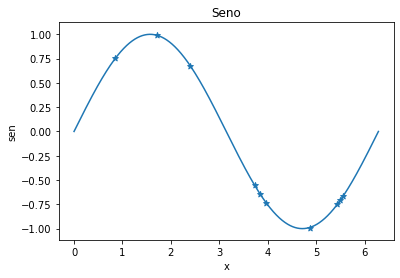

In [7]:
plot_sin_with_samples()

In [8]:
def get_noised_sample(samples_indexes, reference_signal, noise_var):
    pure_sample = [val for idx, val in enumerate(reference_signal) if idx in samples_indexes]
    noise = np.random.normal(0, noise_var, len(pure_sample))
    
    return pure_sample + noise


def plot_sin_with_noised_samples(number_of_samples = 10):
    x = np.linspace(0, 2 * np.pi, 1000)
    y = np.sin(x)
    
    x_len = x.size
    
    samples_indexes = np.random.randint(0, x.size, number_of_samples)
    
    x_samples = [val for idx, val in enumerate(x) if idx in samples_indexes]
    y_samples = get_noised_sample(samples_indexes, y, 0.3)

    file = plt.figure()
    plt.plot(x, y)
    plt.scatter(x_samples, y_samples, marker="*")
    plt.title('Seno')
    plt.ylabel('sen')
    plt.xlabel('x')

    plt.show()

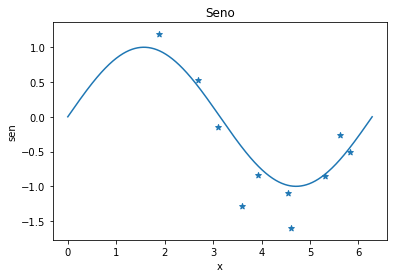

In [9]:
plot_sin_with_noised_samples()

Resolvemos o problema dos mínimos quadrados para a amostra tomada
Criamos features a partir das potências das amostras y
$$ \vec{y} = 1 + y + y^2 + y^3 + ... $$

Criamos um matriz com esses vetores para cada amostra

$$Y = \begin{bmatrix} 1 && 1 && 1 && 1 \\ y_0 && y_1 && y_2 && y_3 \\ y_0^2 && y_1^2 && y_2^2 && y_3^2 \\ \dots \end{bmatrix}$$

In [10]:
def get_feature_matrix(order_m, samples):
    return np.array([power_of(order_m, sample) for sample in samples])

def power_of(order_m, sample):
    return [sample ** n for n in range(0, order_m+1)]


In [11]:
def plot_sin_with_noised_samples_and_regression(number_of_samples = 10, noise_var = 0.3, order_m = 5):
    x = np.linspace(0, 2 * np.pi, 1000)
    y = np.sin(x)
    
    x_len = x.size
    samples_indexes = np.random.randint(0, x.size, number_of_samples)
    
    x_samples = [val for idx, val in enumerate(x) if idx in samples_indexes]
    y_samples = get_noised_sample(samples_indexes, y, 0.3)
    
    w_mse = get_w_mse(x_samples, y_samples, order_m)
    y_mse = get_y_mse(x, w_mse)
    
    file = plt.figure()
    plt.plot(x, y)
    plt.scatter(x_samples, y_samples, marker="*")
    plt.plot(x, y_mse)
    plt.title('Seno')
    plt.ylim([-1.7, 1.7])
    plt.ylabel('sen')
    plt.xlabel('x')

    plt.show()
    
def get_w_mse(x_samples, y_samples, order_m):
    X = get_feature_matrix(order_m, x_samples)
    pseudo_inv = np.linalg.pinv(X)
    
    return pseudo_inv @ np.transpose(y_samples)
    
def get_y_mse(x, w_mse):
    order_m = w_mse.size - 1
    return [power_of(order_m, xi) for xi in x] @ np.transpose(w_mse)

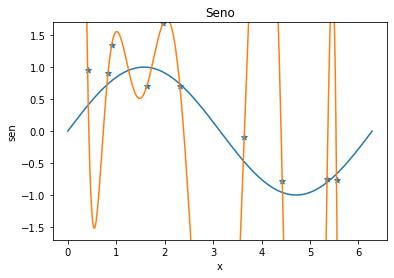

In [12]:
plot_sin_with_noised_samples_and_regression(number_of_samples = 10, noise_var = 0.01, order_m = 9)

In [40]:
from sklearn.linear_model import Lasso, Ridge

In [41]:
def plot_sin_with_noised_samples_and_l1_regularization(number_of_samples = 100, noise_var = 0.3, order_m = 5, alpha=0.01):
    x = np.linspace(0, 2 * np.pi, 1000)
    y = np.sin(x)
    
    x_len = x.size
    samples_indexes = np.random.randint(0, x.size, number_of_samples)
    
    x_samples = [val for idx, val in enumerate(x) if idx in samples_indexes]
    y_samples = get_noised_sample(samples_indexes, y, 0.3)
    
    X = get_feature_matrix(order_m, x_samples)
    reg = Lasso(alpha=alpha)
    reg.fit(X, np.transpose(y_samples))

    w_mse = reg.coef_
    print(w_mse)
    y_mse = [power_of(order_m, xi) for xi in x] @ np.transpose(w_mse)
    
    file = plt.figure()
    plt.plot(x, y)
    plt.scatter(x_samples, y_samples, marker="*")
    plt.plot(x, y_mse)
    plt.title('Sin')
    plt.ylim([-1.7, 1.7])
    plt.ylabel('sin')
    plt.xlabel('x')

    plt.show()

[ 0.00000000e+00  8.89772771e-01 -2.87493427e-01 -2.44006064e-02
  3.39115316e-03  6.60731959e-04  6.36327226e-05  2.56895362e-06
 -6.16400967e-07 -2.18259536e-07]


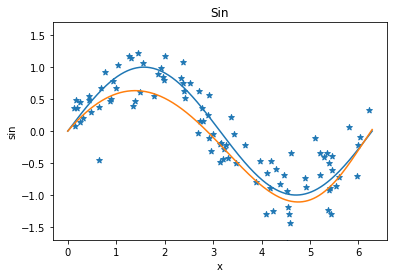

In [42]:
plot_sin_with_noised_samples_and_l1_regularization(100, 0.3, 9)

In [48]:
def plot_sin_with_noised_samples_and_l2_regularization(number_of_samples = 100, noise_var = 0.3, order_m = 5, alpha=0.01):
    x = np.linspace(0, 2 * np.pi, 1000)
    y = np.sin(x)
    
    x_len = x.size
    samples_indexes = np.random.randint(0, x.size, number_of_samples)
    
    x_samples = [val for idx, val in enumerate(x) if idx in samples_indexes]
    y_samples = get_noised_sample(samples_indexes, y, 0.3)
    
    X = get_feature_matrix(order_m, x_samples)
    reg = Ridge(alpha=alpha)
    reg.fit(X, np.transpose(y_samples))

    w_mse = reg.coef_
    print(w_mse)
    y_mse = [power_of(order_m, xi) for xi in x] @ np.transpose(w_mse)
    
    file = plt.figure()
    plt.plot(x, y)
    plt.scatter(x_samples, y_samples, marker="*")
    plt.plot(x, y_mse)
    plt.title('Sin')
    plt.ylim([-1.7, 1.7])
    plt.ylabel('sin')
    plt.xlabel('x')

    plt.show()

[ 0.          0.75874529  0.72123749 -0.62079596  0.1284023  -0.00810544]


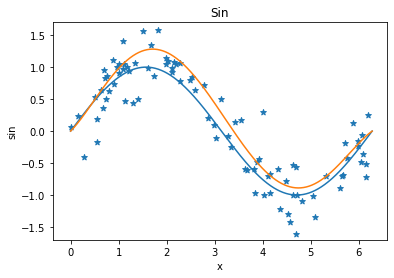

In [49]:
plot_sin_with_noised_samples_and_l2_regularization()

In [50]:
# generic function to use regression with l1 or l2 norms

def plot_sin_with_noised_samples_and_regularization(Model, number_of_samples = 100, noise_var = 0.3, order_m = 5, alpha=0.01):
    x = np.linspace(0, 2 * np.pi, 1000)
    y = np.sin(x)
    
    x_len = x.size
    samples_indexes = np.random.randint(0, x.size, number_of_samples)
    
    x_samples = [val for idx, val in enumerate(x) if idx in samples_indexes]
    y_samples = get_noised_sample(samples_indexes, y, 0.3)
    
    X = get_feature_matrix(order_m, x_samples)
    reg = Model(alpha=alpha)
    reg.fit(X, np.transpose(y_samples))

    w_mse = reg.coef_
    print(w_mse)
    y_mse = [power_of(order_m, xi) for xi in x] @ np.transpose(w_mse)
    
    file = plt.figure()
    plt.plot(x, y)
    plt.scatter(x_samples, y_samples, marker="*")
    plt.plot(x, y_mse)
    plt.title('Sin')
    plt.ylim([-1.7, 1.7])
    plt.ylabel('sin')
    plt.xlabel('x')



[ 0.00000000e+00  8.19316158e-01 -2.45597037e-01 -2.45249604e-02
  2.55504742e-03  7.02031767e-04]


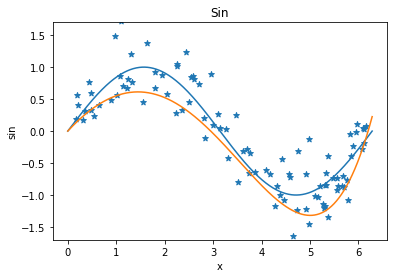

In [51]:
plot_sin_with_noised_samples_and_regularization(Lasso)

[ 0.          1.25033611 -0.09161078 -0.2721369   0.06997546 -0.00468885]


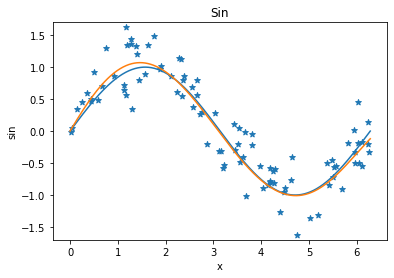

In [52]:
plot_sin_with_noised_samples_and_regularization(Ridge)